In [8]:
import sys
import numpy as np

sys.path.append('../code')
from utils import get_dataset

In [9]:
x_train, x_test, y_train, y_test = get_dataset('fashion-mnist', 20, 800, 200)

# Get optimal parameters using K-fold cross-validation

In [10]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.svm import SVC

scale_gamma = 800 * np.var(x_train)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
param_grid = [
    {
        'C': [0.006, 0.015, 0.03, 0.0625, 0.125, 0.25, 0.5, 1.0, 2.0, 4.0, 8.0, 16.0, 32.0, 64.0, 128.0, 256, 512, 1024], 
        'gamma': [x / scale_gamma for x in [0.25, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 20.0, 50, 100, 200, 500, 1000, 5000, 10000]], 
        'kernel': ['rbf']
    },
]

svc = SVC()
clf =  GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)
print(f"Best score: {clf.best_score_}")

y_pred_cl = clf.predict(x_test)

print(f"Test score: {balanced_accuracy_score(y_pred_cl,y_test)}")

Best score: 0.945
Test score: 0.9055555555555556


In [11]:
print(clf.best_params_)

{'C': 8.0, 'gamma': 0.1494365632147676, 'kernel': 'rbf'}


### Fix C to be optimal and vary gamma

In [12]:
params = {'C': 8.0, 'kernel': 'rbf'}

scale_gamma = 1000 * np.var(x_train)

gammas = []
train_scores = []
val_scores = []
ns_support = []

for gamma in np.logspace(-6,1,100):
    svc = SVC(gamma=gamma, **params)
    svc.fit(x_train, y_train)
    y_pred_train = svc.predict(x_train)
    train_score = balanced_accuracy_score(y_train,y_pred_train)
    n_support = svc.n_support_
    y_pred_cl = svc.predict(x_test)

    val_score = balanced_accuracy_score(y_test,y_pred_cl)
    gammas.append(gamma)
    val_scores.append(val_score)
    train_scores.append(train_score)
    ns_support.append(np.mean(n_support))

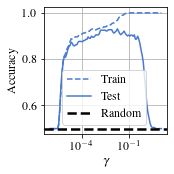

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Times']})
rc('text', usetex=True)

f, ax=plt.subplots(figsize=(2*6.92654/5.5, 2*6.92654/5.5))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.plot(gammas, train_scores,label='Train',c=sns.color_palette("muted")[0], linestyle='dashed')
plt.plot(gammas, val_scores,label='Test',c=sns.color_palette("muted")[0])

plt.axhline(y=0.5, color='k', linestyle='dashed', label='Random', linewidth=2.5)

plt.ylabel('Accuracy', fontsize=12)
plt.xlabel(r'$\gamma$', fontsize=12)
plt.xscale('log')
plt.legend(loc='lower center', bbox_to_anchor=(0.49, 0.03), fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('rbf_test_score_vs_gamma.pdf')

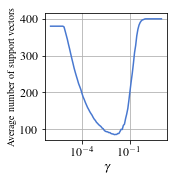

In [18]:

f, ax=plt.subplots(figsize=(2*6.92654/5.5, 2*6.92654/5.5))
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

plt.plot(gammas, ns_support,c=sns.color_palette("muted")[0])
plt.ylabel('Average number of support vectors')
plt.xlabel(r'$\gamma$', fontsize=12)
plt.xscale('log')
plt.grid()
plt.tight_layout()

plt.savefig('rbf_nsupport_vs_gamma.pdf')